In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset-1/Sleep_health_and_lifestyle_dataset.csv')
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df[['blood_pressure_1', 'blood_pressure_2']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert them to numeric (optional but recommended)
df['blood_pressure_1'] = pd.to_numeric(df['blood_pressure_1'], errors='coerce')
df['blood_pressure_2'] = pd.to_numeric(df['blood_pressure_2'], errors='coerce')
df.drop('Blood Pressure', axis=1, inplace=True)
df.drop('Person ID', axis=1, inplace=True)



In [ ]:
df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,blood_pressure_1,blood_pressure_2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [ ]:
df.shape

(374, 13)

In [ ]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,blood_pressure_1,blood_pressure_2
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [ ]:
df.dtypes

,0
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Heart Rate,int64
Daily Steps,int64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,True
3,False
4,True
...,...
369,True
370,True
371,True
372,True


In [ ]:
df.duplicated().sum()

np.int64(242)

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0


In [ ]:
df.shape

(155, 13)

In [ ]:
df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,blood_pressure_1,blood_pressure_2
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,80,4000,Sleep Apnea,132,87


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,103
Male,52


In [ ]:
df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)
df.head(5)

<ipython-input-16-309ad1d2c17b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,blood_pressure_1,blood_pressure_2
3,0,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,0,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,0,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
6,0,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
16,1,29,Nurse,6.5,5,40,7,Normal Weight,80,4000,Sleep Apnea,132,87


In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,64
Teacher,31
Salesperson,30
Doctor,7
Accountant,7
Engineer,6
Lawyer,5
Sales Representative,2
Scientist,2


In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Overweight,129
Normal,12
Obese,10
Normal Weight,4


In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


# Encoding Categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Columns to encode
columns_to_encode = ['Occupation','BMI Category','Sleep Disorder']

encoders = {}

# Apply label encoding using a loop
for column in columns_to_encode:
   le = LabelEncoder()
   df[column] = le.fit_transform(df[column])
   encoders[column] = le

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#decode Occupation column
decoded_occupation = encoders['Occupation'].inverse_transform(df['Occupation'])
print(decoded_occupation)

['Sales Representative' 'Sales Representative' 'Software Engineer'
 'Teacher' 'Nurse' 'Doctor' 'Nurse' 'Nurse' 'Nurse' 'Doctor' 'Doctor'
 'Scientist' 'Scientist' 'Lawyer' 'Accountant' 'Teacher' 'Teacher'
 'Teacher' 'Lawyer' 'Lawyer' 'Lawyer' 'Engineer' 'Lawyer' 'Salesperson'
 'Teacher' 'Teacher' 'Teacher' 'Salesperson' 'Teacher' 'Salesperson'
 'Teacher' 'Salesperson' 'Salesperson' 'Salesperson' 'Salesperson'
 'Salesperson' 'Salesperson' 'Salesperson' 'Salesperson' 'Salesperson'
 'Salesperson' 'Engineer' 'Engineer' 'Engineer' 'Salesperson' 'Teacher'
 'Salesperson' 'Salesperson' 'Salesperson' 'Teacher' 'Salesperson'
 'Teacher' 'Salesperson' 'Teacher' 'Salesperson' 'Teacher' 'Salesperson'
 'Teacher' 'Salesperson' 'Teacher' 'Salesperson' 'Salesperson' 'Teacher'
 'Salesperson' 'Salesperson' 'Teacher' 'Salesperson' 'Salesperson'
 'Teacher' 'Salesperson' 'Teacher' 'Salesperson' 'Engineer' 'Teacher'
 'Teacher' 'Teacher' 'Teacher' 'Teacher' 'Teacher' 'Teacher' 'Teacher'
 'Teacher' 'Teacher' 'Te

In [ ]:
decoded = encoders['Occupation'].inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(decoded)

['Accountant' 'Doctor' 'Engineer' 'Lawyer' 'Nurse' 'Sales Representative'
 'Salesperson' 'Scientist' 'Software Engineer' 'Teacher']


In [ ]:
#decode BMI Category column
decoded_BMI_Category = encoders['BMI Category'].inverse_transform(df['BMI Category'])
print(decoded_BMI_Category)

['Obese' 'Obese' 'Obese' 'Obese' 'Normal Weight' 'Normal' 'Normal Weight'
 'Normal Weight' 'Normal Weight' 'Normal' 'Normal' 'Overweight'
 'Overweight' 'Obese' 'Normal' 'Overweight' 'Normal' 'Overweight' 'Normal'
 'Obese' 'Normal' 'Overweight' 'Normal' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Normal' 'Normal' 'Normal' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Overweight' 'Overweight' 'Overweight' 'Overwe

In [ ]:
decoded = encoders['BMI Category'].inverse_transform([0, 1, 2, 3])
print(decoded)

['Normal' 'Normal Weight' 'Obese' 'Overweight']


In [ ]:
#decode Sleep Disorder column
decoded_Sleep_Disorder = encoders['Sleep Disorder'].inverse_transform(df['Sleep Disorder'])
print(decoded_Sleep_Disorder)

['Sleep Apnea' 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Sleep Apnea' 'Insomnia' 'Sleep Apnea'
 'Insomnia' 'Sleep Apnea' 'Sleep Apnea' 'Sleep Apnea' 'Insomnia'
 'Sleep Apnea' 'Sleep Apnea' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'
 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia' 'Insomnia'

In [ ]:
decoded = encoders['Sleep Disorder'].inverse_transform([0, 1])
print(decoded)

['Insomnia' 'Sleep Apnea']


In [ ]:
df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,blood_pressure_1,blood_pressure_2
3,0,28,5,5.9,4,30,8,2,85,3000,1,140,90
4,0,28,5,5.9,4,30,8,2,85,3000,1,140,90
5,0,28,8,5.9,4,30,8,2,85,3000,0,140,90
6,0,29,9,6.3,6,40,7,2,82,3500,0,140,90
16,1,29,4,6.5,5,40,7,1,80,4000,1,132,87


In [ ]:
x=df.drop(['Stress Level'],axis=1)   #independent varaiable
x

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,blood_pressure_1,blood_pressure_2
3,0,28,5,5.9,4,30,2,85,3000,1,140,90
4,0,28,5,5.9,4,30,2,85,3000,1,140,90
5,0,28,8,5.9,4,30,2,85,3000,0,140,90
6,0,29,9,6.3,6,40,2,82,3500,0,140,90
16,1,29,4,6.5,5,40,1,80,4000,1,132,87
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,4,8.1,9,75,3,68,7000,1,140,95
370,1,59,4,8.0,9,75,3,68,7000,1,140,95
371,1,59,4,8.1,9,75,3,68,7000,1,140,95
372,1,59,4,8.1,9,75,3,68,7000,1,140,95


In [ ]:
y=df['Stress Level']   #dependent variable
y

,Stress Level
3,8
4,8
5,8
6,7
16,7
...,...
369,3
370,3
371,3
372,3


## Scaling

In [ ]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.407398,-2.384477,-0.015492,-1.183160,-2.153758,-1.502214,-0.755881,2.555381,-1.994809,0.993569,0.943896,0.039884
1,-1.407398,-2.384477,-0.015492,-1.183160,-2.153758,-1.502214,-0.755881,2.555381,-1.994809,0.993569,0.943896,0.039884
2,-1.407398,-2.384477,1.185117,-1.183160,-2.153758,-1.502214,-0.755881,2.555381,-1.994809,-1.006473,0.943896,0.039884
3,-1.407398,-2.256501,1.585320,-0.664377,-0.653387,-1.016010,-0.755881,1.975179,-1.729951,-1.006473,0.943896,0.039884
4,0.710531,-2.256501,-0.415695,-0.404986,-1.403573,-1.016010,-1.915897,1.588379,-1.465093,0.993569,-0.543310,-0.578316
...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.710531,1.582771,-0.415695,1.670147,1.597169,0.685705,0.404135,-0.732426,0.124056,0.993569,0.943896,1.070218
151,0.710531,1.582771,-0.415695,1.540451,1.597169,0.685705,0.404135,-0.732426,0.124056,0.993569,0.943896,1.070218
152,0.710531,1.582771,-0.415695,1.670147,1.597169,0.685705,0.404135,-0.732426,0.124056,0.993569,0.943896,1.070218
153,0.710531,1.582771,-0.415695,1.670147,1.597169,0.685705,0.404135,-0.732426,0.124056,0.993569,0.943896,1.070218


# For Train Our Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(108, 12)
(47, 12)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(108,)
(47,)


# **Decision Tree Regression**

In [ ]:
from  sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import numpy as np

In [ ]:
dtr = DecisionTreeRegressor(criterion='squared_error',min_samples_split=4,max_depth=1000)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1000, min_samples_split=4)

In [ ]:
y_pred=dtr.predict(x_test)

In [ ]:
print("MSE :" , mean_squared_error(y_test,y_pred))
print("RMSE :" , np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE :" , mean_absolute_error(y_test,y_pred))
print("R Squared :" , r2_score(y_test,y_pred))

MSE : 0.1702127659574468
RMSE : 0.41256849850351734
MAE : 0.0851063829787234
R Squared : 0.9536603401528223


In [ ]:
dtr_r2 = r2_score(y_test,y_pred)

# **Random Forest Regression**

In [ ]:
from  sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print("MSE :" , mean_squared_error(y_test,y_pred))
print("RMSE :" , np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE :" , mean_absolute_error(y_test,y_pred))
print("r2 Squared :" , r2_score(y_test,y_pred))

MSE : 0.18673829787234042
RMSE : 0.4321322689551666
MAE : 0.11680851063829788
r2 Squared : 0.9491613384274095


In [ ]:
rfr_r2 = r2_score(y_test,y_pred)

#**Support Vector Regression**


In [ ]:
from  sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 0.20599785522386413
RMSE: 0.45386986595704293
MAE: 0.2074689300372401
R2: 0.9439180105756081


In [ ]:
svr_r2 = r2_score(y_test,y_pred)

# R-Squared Score

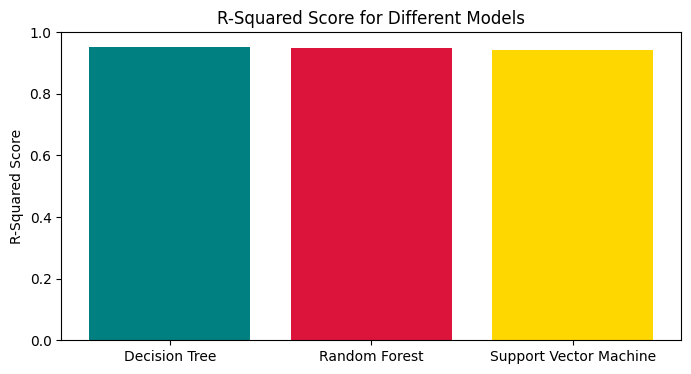

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Random Forest', 'Support Vector Machine']                      # all 3 models are good for fit for the dataset and most accurate prediction among
r2_scores = [dtr_r2, rfr_r2, svr_r2]                                                       # 3 is Random forest
plt.figure(figsize=(8,4))
plt.bar(models, r2_scores,color = ['teal','crimson','gold'])
plt.ylabel('R-Squared Score')
plt.title("R-Squared Score for Different Models")
plt.ylim(0,1)
plt.show()

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(rfr, 'random_forest_model.pkl')

['random_forest_model.pkl']